In [184]:
%matplotlib inline


In [185]:
# Dependencies
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import matplotlib.style as style

In [186]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [187]:
# Read city file and store in pandas DataFrame
cityDataDF = pd.read_csv(city_data_to_load)
cityDataDF.head(10)# Read city file and store in pandas DataFrame
cityDataDF = pd.read_csv(city_data_to_load)

In [188]:
# Read ride file and store in pandas DataFrame
rideDataDF = pd.read_csv(ride_data_to_load)

In [189]:
# Get columns and rows that are not null
cityDataDF.count()

city            120
driver_count    120
type            120
dtype: int64

In [190]:
# Double check columns and rows for null
cityDataDF.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [191]:
# Get data types of each column
cityDataDF.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [192]:
# Get unique values of type of city
cityDataDF["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [193]:
# Get columns and rows not null in ride data
rideDataDF.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [194]:
# Check the types of data in ride data
rideDataDF.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [195]:
# Merge data into single dataset
pyberDataDF = pd.merge(rideDataDF, cityDataDF, how="left", on=['city', 'city'])
# Display merged dataframe
pyberDataDF.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [196]:
# Get total count of rides for urban, suburban, rural cities
ridesCountTotal = pyberDataDF.groupby(["type"]).count()["ride_id"]
ridesCountTotal

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [197]:
# Get average fare per ride
farePerRide = pyberDataDF.groupby(["type"]).mean()["fare"]
farePerRide

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [198]:
# Get number of drivers for urban, suburban, rural cities
driversCountTotal = cityDataDF.groupby(["type"]).sum()["driver_count"]
driversCountTotal

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [199]:
# Get total cost of fares for urban, suburban, rural cities
faresCostTotal = pyberDataDF.groupby(["type"]).sum()["fare"]
faresCostTotal

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [200]:
# Get Average Fare per Driver
farePerDriver = faresCostTotal / driversCountTotal
farePerDriver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [201]:
# Create a list of values with keys to put in new DataFrame.
pyberSummaryDF = pd.DataFrame(
          {"Total Rides": ridesCountTotal,
          "Total Drivers": driversCountTotal,
          "Total Fares": faresCostTotal,
          "Average Fare per Ride": farePerRide,
          "Average Fare per Driver": farePerDriver})
# Remove index name "type"
pyberSummaryDF.index.name = None
# Format data
pyberSummaryDF["Total Rides"] = pyberSummaryDF["Total Rides"].map("{: ,}".format)
pyberSummaryDF["Total Drivers"] = pyberSummaryDF["Total Drivers"].map("{: ,}".format)
pyberSummaryDF["Total Fares"] = pyberSummaryDF["Total Fares"].map("${:,.2f}".format)
pyberSummaryDF["Average Fare per Ride"] = pyberSummaryDF["Average Fare per Ride"].map("${:,.2f}".format)
pyberSummaryDF["Average Fare per Driver"] = pyberSummaryDF["Average Fare per Driver"].map("${:,.2f}".format)
# Display dataframe
pyberSummaryDF

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [202]:
# Rename columns for merged dataframe pyberDataDF
pyberDataDF.rename(columns={'city':'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'}, inplace=True)
pyberDataDF

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [203]:
# Set index to date column
pyberDataDF.set_index("Date", inplace=True)
pyberDataDF 

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [204]:
# Create new dataframe with data column as index
pyberDataNewDF = pyberDataDF[["City Type", "Fare"]].copy()

pyberDataNewDF

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
...,...,...
2019-04-29 17:04:39,Rural,13.38
2019-01-30 00:05:47,Rural,20.76
2019-02-10 21:03:50,Rural,11.11


In [205]:
# Set date index to datetime
pyberDataNewDF.index=pd.to_datetime(pyberDataNewDF.index) 

In [206]:
# Check if index is datatime data type
pyberDataNewDF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [207]:
# Sum fares by date and city type
pivotPyberDF = pyberDataNewDF.groupby(["Date", "City Type"]).sum()

In [208]:
# Pivot seriesdataframe
pivotDF = pyberDataNewDF.pivot_table(index="Date", columns="City Type", values="Fare")
pivotDF

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [256]:
newPivotDF = pivotDF.loc['2019-01-01':'2019-04-28']

newPivotDF

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [210]:
# Create bins

newPivotDF = newPivotDF.resample('W').sum()
newPivotDF

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


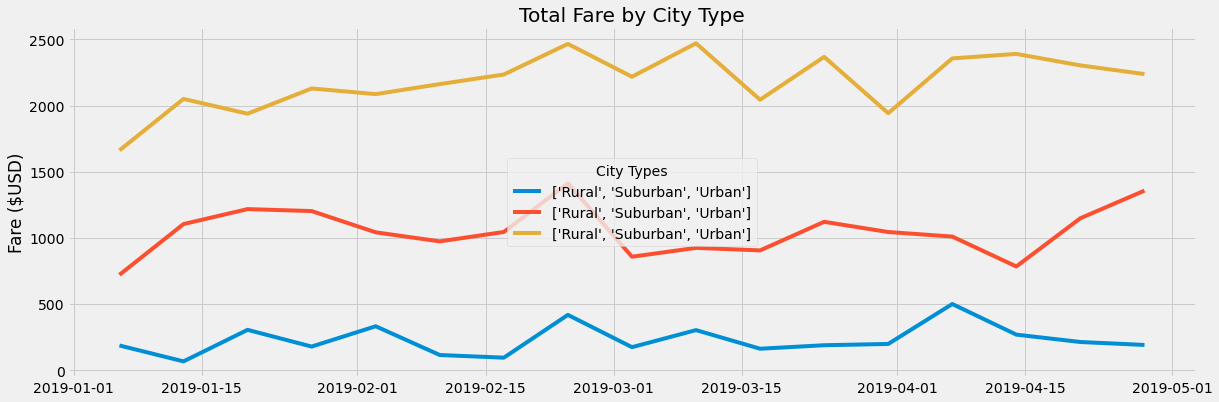

In [255]:
# Create Line Chart with fivethirtyeight
legend = ["Rural","Suburban","Urban"]

fig, ax = plt.subplots(figsize=(18,6))
plt.style.use('fivethirtyeight')
ax.plot(newPivotDF, label=["Rural","Suburban","Urban"])

# Add title, axes labels,
ax.set_title("Total Fare by City Type")
ax.set_ylabel("Fare ($USD)")
ax.legend(mode='Expanded', title='City Types')

# Save figure
plt.savefig("Analysis/Fig8.png")